# Wish.com - EDA insights

We have the summer sales data from **wish.com** for France in `summer-products-with-rating-and-performance_2020-08.csv`. I am trying to gain isights from analysing the data.

source: https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish/notebooks
![title](wish_web_interface.jpg)

In [1]:
#importing the most relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
plt.rcParams.update({'font.size': 22})

wish_df = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

Now we check
* the dimensions of the data
* if there are any unfilled cells   

Then we drop the duplicates and check the size again

In [2]:
print('Dimensions of the df', wish_df.shape)
print(wish_df.isnull().sum()) #checking how many values are not filled in each column
wish_df = wish_df.drop_duplicates() # removing the duplicates if any
print('Dimensions of the df after dropping the duplicates', wish_df.shape)

Dimensions of the df (1573, 43)
title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
invent

Now we try to idnentify the categorical variables.
For this, we look at the unique values. If there are only less than 20 unique values, we can safely say that these variables are categorical. In the following cell, we print those categorical values.
However, please note that it is entirely possible to have more than 20 values for cateogrical variables.

In [3]:
print('{:<30} {:<15}'.format('column', 'unique values'))
for key in wish_df.keys():
    uniques = len(wish_df[str(key)].unique())
    print('{:<30} {:<15}'.format(str(key) , uniques)) #prints how many unique values are present in a column
    if uniques <= 20 : # If a column has less than or equal to 20 values, it shows the categories
         print('\t:', wish_df[str(key)].unique()) 

column                         unique values  
title                          1201           
title_orig                     1203           
price                          127            
retail_price                   104            
currency_buyer                 1              
	: ['EUR']
units_sold                     15             
	: [   100  20000   5000     10  50000   1000  10000 100000     50      1
      7      2      3      8      6]
uses_ad_boosts                 2              
	: [0 1]
rating                         192            
rating_count                   761            
rating_five_count              606            
rating_four_count              441            
rating_three_count             385            
rating_two_count               263            
rating_one_count               331            
badges_count                   4              
	: [0 1 2 3]
badge_local_product            2              
	: [0 1]
badge_product_quality          2              
	

The above numbers shows that
* 1201 unque items are listed as 1573 items over 958 unique sellers
* Only 473 items have urgency banner
* `has_urgency_barrier` is binary
* There are only two kinds of urgency texts, if present
* Products are available from 6 different countries
* 45 items have no ratings
* Most merchants (1347/1573) don't have profile picture
* All the items are priced in Euro

In [4]:
wish_df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


Our target variable here `units_sold`.
Now we need to look into features and how they correlate with `units_sold`.  

For the ease of analysis, if the number of units sold is less than 10, it's rounded up to 10.
We look at the first item in the list to see how a listing actually looks like.

In [5]:
wish_df['units_sold'] = [10 if x < 10 else x for x in wish_df['units_sold']]
wish_df.iloc[0,:] #Here we take a look at the sample

title                           2020 Summer Vintage Flamingo Print  Pajamas Se...
title_orig                      2020 Summer Vintage Flamingo Print  Pajamas Se...
price                                                                          16
retail_price                                                                   14
currency_buyer                                                                EUR
units_sold                                                                    100
uses_ad_boosts                                                                  0
rating                                                                       3.76
rating_count                                                                   54
rating_five_count                                                              26
rating_four_count                                                               8
rating_three_count                                                             10
rating_two_count

Now we examine different how different aspects of a product influence the sales.

## Merchant and sales
In this section we examine the relationship between the merchant data and the sales data

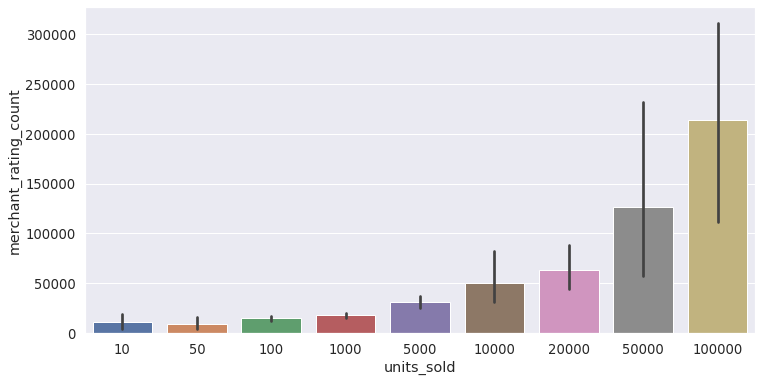

In [6]:
import seaborn as sns
sns.set(font_scale=1.2)
plt.figure(figsize=(12,6))
sns.barplot(y='merchant_rating_count', x='units_sold', data=wish_df) 

The above figure clearly establishes a positive correlation between the number of ratings received by a merchant and the units sold.    
In other words, **the higher the votes of rating for a merchant, the higher the sale.**  
Next we examine the relationship between the merchant profile and the sales.

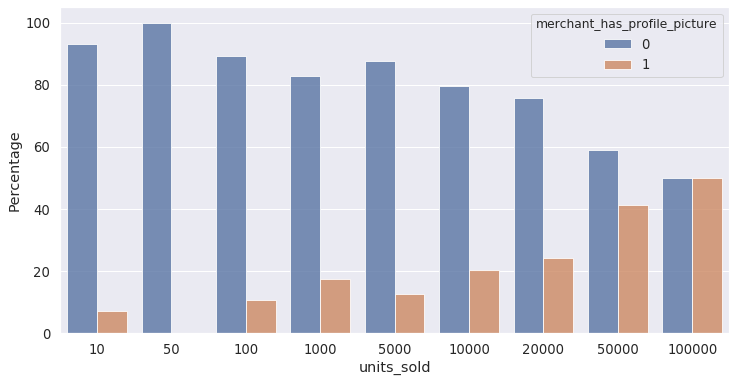

In [7]:
plt.figure(figsize=(12,6))
merch_pic = (wish_df.groupby(['units_sold'])['merchant_has_profile_picture'].value_counts(normalize=True).rename('Percentage').mul(100)
            .reset_index())
# print(merch_pic)
p = sns.barplot(x='units_sold', y='Percentage', hue='merchant_has_profile_picture', data=merch_pic, alpha=0.8)

The plot above shows that **in the higher selling range more merchants tend to have a profile picture**. This could be the basic human psychology. If we can put a face to something, that's more acceptable. For example, in dating sites those profiles with a profile picture has higher response rate than those who don't.

Next, we examine the relationship between the rating of a merchant and the sales.

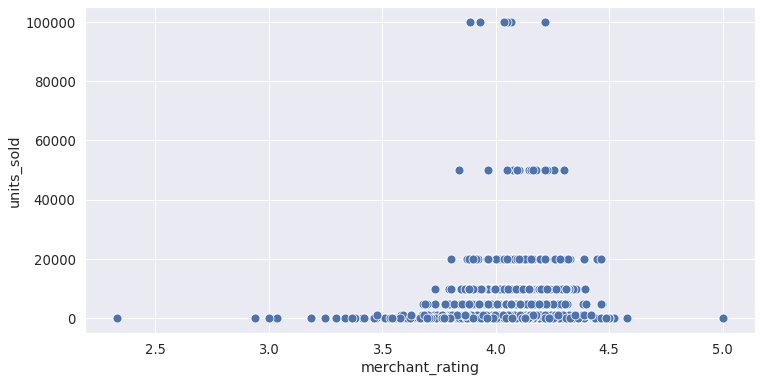

In [8]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=wish_df.merchant_rating, y=wish_df.units_sold, s=80)

We can make the following observations from the figure above.
* The **products that are sold in higher numbers have a merchant rating in the range of 3.75-4.5** ie, moderately high
* If a merchant has above 4.5 rating, he/she has sold very few items

## Geography and sales

In this section we examine the relationship between geography and sales.
If the origin country is not marked, we mark it as Nil.

['CN' 'US' 'Nil' 'VE' 'AT' 'SG' 'GB']


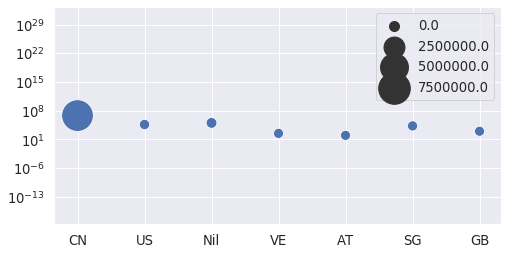

In [9]:
wish_df['origin_country'] = wish_df.origin_country.fillna('Nil') #Marking the gaps as unknown
origin_countries = wish_df.origin_country.unique()
print(origin_countries)
volume_sold = np.zeros(len(origin_countries)) #to calculate the total volume of prodcut sold from a country
for i, country in enumerate(origin_countries):
#     print(i, country)
    volume_sold[i] = wish_df[wish_df['origin_country'] == str(country)]['units_sold'].sum()

# print(volume_sold)
fig, ax = plt.subplots(figsize=(8,4))
ax.set_yscale('log')
sns.scatterplot(x=origin_countries,y=volume_sold, size=volume_sold, sizes=(100,1000))

Most of the items are of Chinese origin. Given the fact that China is one of the biggest manufacturing powers, this is not surprising. So the Chinese products will dominate all the sales ranges.

Hence we look at the units sold by other countries.

(0, 80)

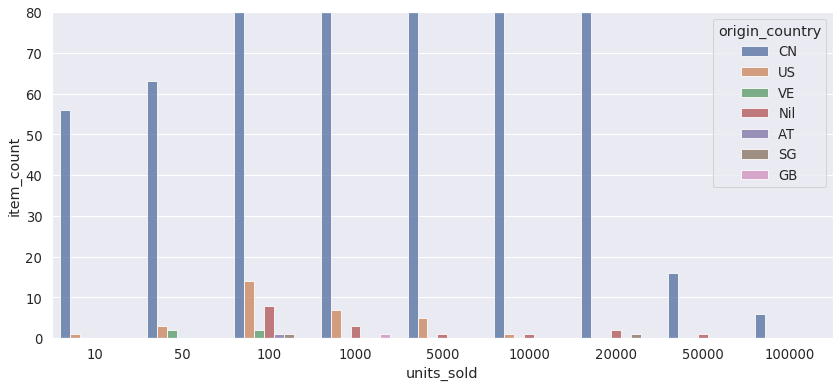

In [10]:
plt.figure(figsize=(14,6))
geo_sales = (wish_df.groupby(['units_sold'])['origin_country'].value_counts().rename('item_count')
            .reset_index())
# print(merch_pic)
sns.barplot(x='units_sold', y='item_count', hue='origin_country', data=geo_sales, alpha=0.8)
plt.legend(title='origin_country', loc='upper right')
plt.ylim(0,80)

From the picture above, we can see that the Chinese products also dominate all the ranges.
After China, majority of the products come from the US. After US, it's the countries of unmarked origin. Diversity in origin country is present only in the sales range of 100 and 1000.

Next, we examine if the units sold are influenced by the number of countries they are shipped to.

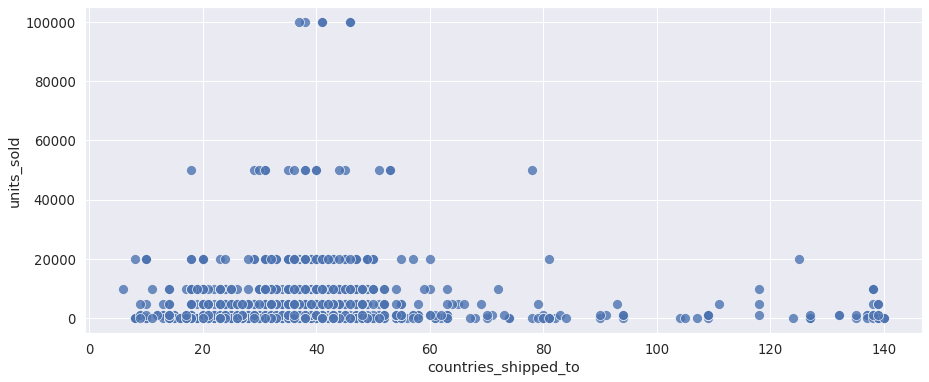

In [11]:
target_countries = wish_df.countries_shipped_to.unique()
# print(target_countries)
fig, ax = plt.subplots(figsize=(15,6))
sns.scatterplot(x=wish_df.countries_shipped_to,y=wish_df.units_sold, s=100, alpha=0.8)

**If a product is delivered to larger number of countries, it doesn't mean that it will be sold more.**
The maximum sales happen when they are shipped to a range of 15-60 countires.

## Rating and sales
In this section, we examine the relationship between product ratings and sales.

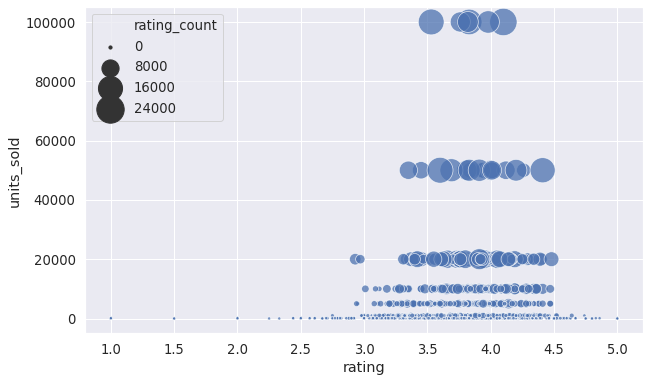

In [12]:
#If no urgency text is present, then filled none.
wish_df['urgency_text'] = wish_df['urgency_text'].fillna('None')
#If has_urgency_banner is not present, then filled with zero.
wish_df['has_urgency_banner'] = wish_df['has_urgency_banner'].fillna(0)

plt.figure(figsize=(10,6))
# sns.countplot(y='rating', hue='units_sold', data=wish_df)
sns.scatterplot(wish_df['rating'], wish_df['units_sold'], size=wish_df.rating_count, sizes=(10,750), alpha=0.75)
plt.legend(loc='upper left')

We can see that the **largest sales happen in the range of 3-4.5 ratings.**
* Extremely low rated products barely sell
* Extremely high rated products have lesser votes of rating, so the customers need not trust the rating completely

Now we have to check how the sales depend also on the number of each ratings received

Text(0, 0.5, 'Units sold')

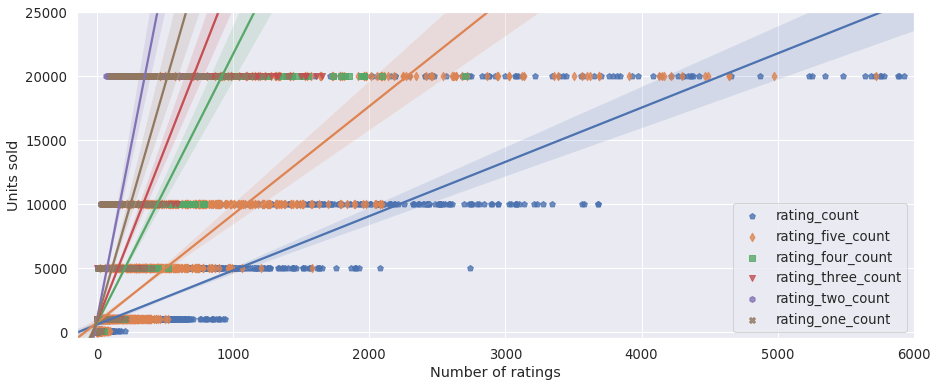

In [13]:
rating = ['rating_count', 'rating_five_count','rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count']
markers = ['p', 'd', 's', 'v', 'h', 'X']

plt.figure(figsize=(15,6))
plt.ylim(-500, 25000)
plt.xlim(-150, 6000)
for i in range(len(rating)):
    sns.regplot(x=rating[i], y='units_sold', data=wish_df, label=rating[i], marker=markers[i])

plt.legend()
plt.xlabel('Number of ratings')
plt.ylabel('Units sold')

This figure establishes **a strong linear relationship between number of ratings received and the units sold**.
However **the dependence on the star ratings is not the same for all**.

**The higher star ratings have higher impact than the lower star ratings.**

Now we look at the correlation matrix between ratings and `units_sold`.

(7, 0)

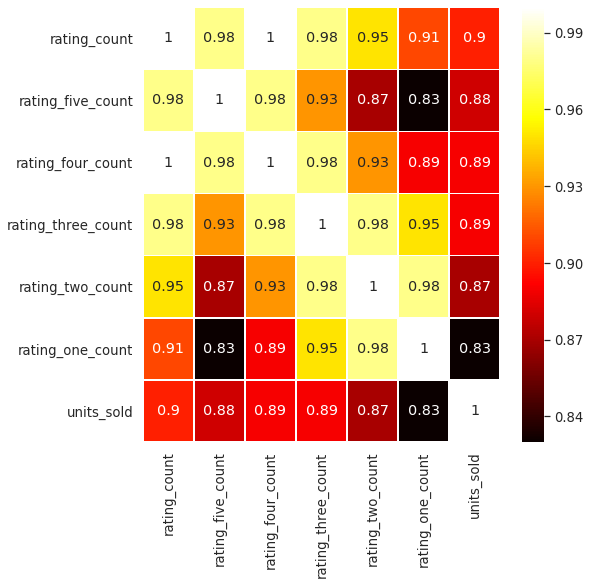

In [14]:
rating.append('units_sold')
rating_corr = wish_df[rating].corr().round(2)
plt.figure(figsize=(8,8))
ax = sns.heatmap(rating_corr.round(2), annot=True, linewidths=.5, cmap='hot')
ax.set_ylim(len(rating), 0) 

The above correlation matrix shows that different ratings are correlated to each other strongly. Even one star and five star rating has a correlation of 0.83. **But `units_sold` has the strongest correlation with total ratings**, though only by a little over the others. So, when one prepares the model, he/she doesn't need to take all the different ratings into consideration.

## Customer tastes and demands

In this section we look at other aspects such as type of product, size, color etc.  
Here utilize wordclouds to get insights about the these types of information. Here there are two types of wordclouds.  
1. The wordclouds in gray background show the items listed per se.
2. The wordclouds in black background show words weighed proportional to their sales.

So in the second one, the most sold items will be having the largest size.

Note: We utilize *only those items which are sold at least 1000 units* for the ease of analysis.

In the first case, we look at the names of the products in English.


### By title of the product

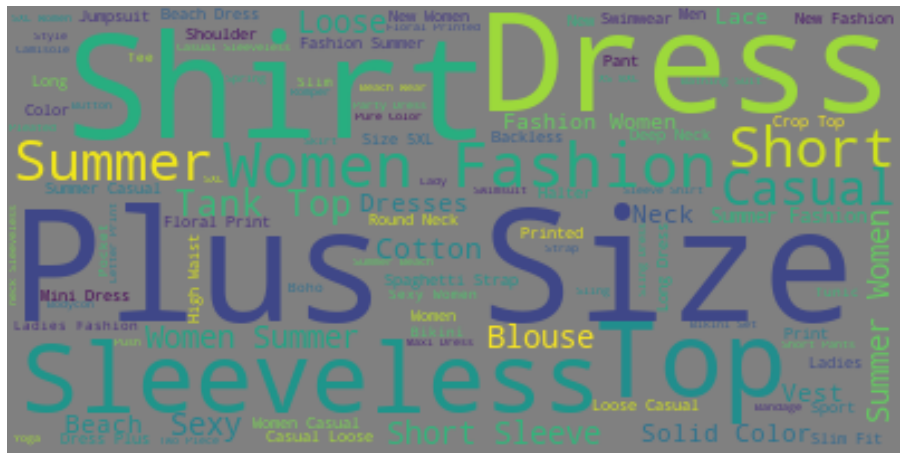

In [15]:
from wordcloud import WordCloud

good_sales = wish_df['units_sold'] >= 1000
# with this we can focus only on those items that are sold considerably
alltitle = ''
alltitle_total = ''
for i, j in enumerate(wish_df[good_sales].title_orig):
    sold_units = wish_df[good_sales]['units_sold'].iloc[i]/1000
    # title_orig only focuses on the keywords
    # it doesn't say how much it is sold
    # so in order to understand the extent of popularity of a keyword,
    # it needs to multiplied by the times it's sold
    # to make things more efficient we divide it by 1000
    alltitle += ' ' + j
    # alltitle makes a huge sentence composed of all the words in the title combined together
    alltitle_total += (' ' + j)*int(sold_units)
    # alltitle_total has each word multiplied by the number of products sold

plt.figure(figsize=(16,16))
cloud = WordCloud(max_words=100, background_color="gray").generate(alltitle)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From the above wordcloud we can make the following insights about the listings:
* Plus size items are highly listed
* Women's fashion is featured prominently
* Shirt, Top, Dress, Sleeveless are listed prominently

Now we look at the keywords weighed by the units sold. We avoid generic terms such as fashion, summer, women to understand which specific items are sold the most.

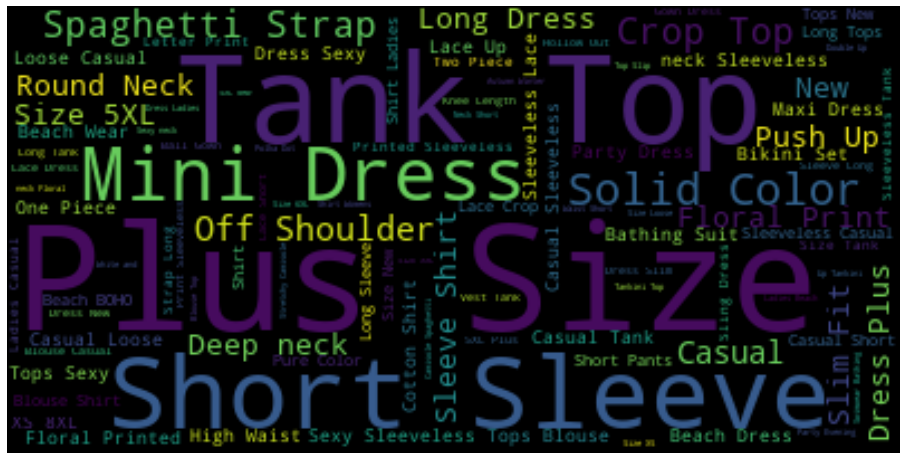

In [16]:
plt.figure(figsize=(16,16))
cloud = WordCloud(max_words=100, stopwords=['Women', 'Summer', 'Fashion'], background_color="black").generate(alltitle_total)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

By sales the items with these words in the title are in most demand
* Tank Top
* Plus Size items
* Short sleeves
* Mini Dress

Suggestion:
* Find a way on how to make use of each word in the title to be used as a feature

### By size
First we examine by the listings:

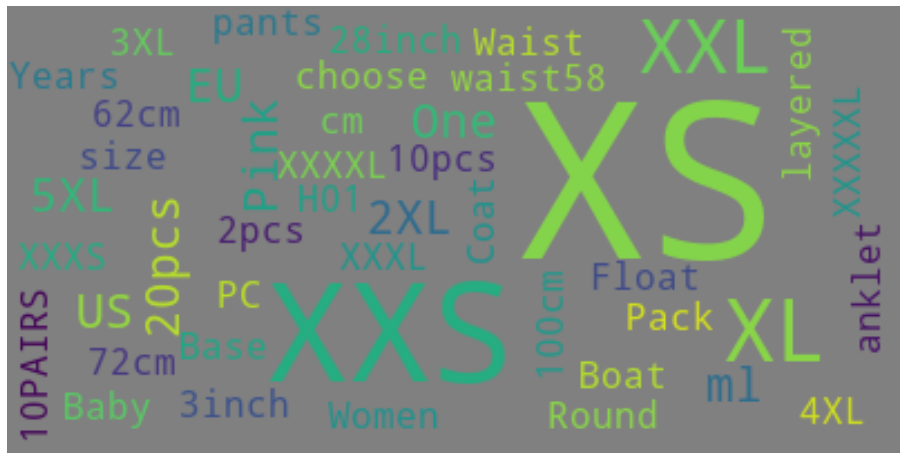

In [17]:
from wordcloud import WordCloud
wish_df['product_variation_size_id'] = wish_df['product_variation_size_id'].fillna('X')
wish_df['product_variation_size_id'] = wish_df['product_variation_size_id'].str.replace('Size','')
allsize = ''
allsize_total = ''
for i, j in enumerate(wish_df[good_sales].product_variation_size_id):
    sold_units = wish_df[good_sales]['units_sold'].iloc[i]/1000
    allsize += ' ' + str(j)
    allsize_total += ('  ' + str(j))*int(sold_units)

plt.figure(figsize=(16,16))
cloud = WordCloud(max_words=100, background_color="gray").generate(allsize)
plt.imshow(cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

The following sizes are the highest in listings:
* XS
* XXS
* XL
* XXL

Next we look at size in terms of units sold

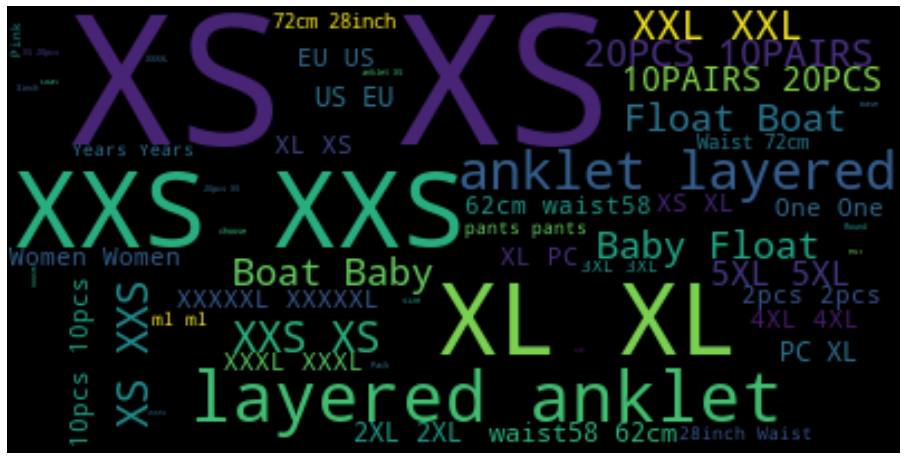

In [18]:
plt.figure(figsize=(16,16))
cloud = WordCloud(max_words=100, background_color="black").generate(allsize_total)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The following sizes are the highest in demand:
* XS
* XXS
* XL

The other popular items sold:
* layered anklets
* baby floats
* pieces sold in pairs (socks?)

I am currently not attempting to quantify theis information as separate units are often used.
For eg., in S/X/L units, cm, EU/US

Suggestion:
* Convert all the units into the same format and use them as categorical variables

### By color

Here also first we examine listings and then by sales. The products for which color is not given is filled as black  white.

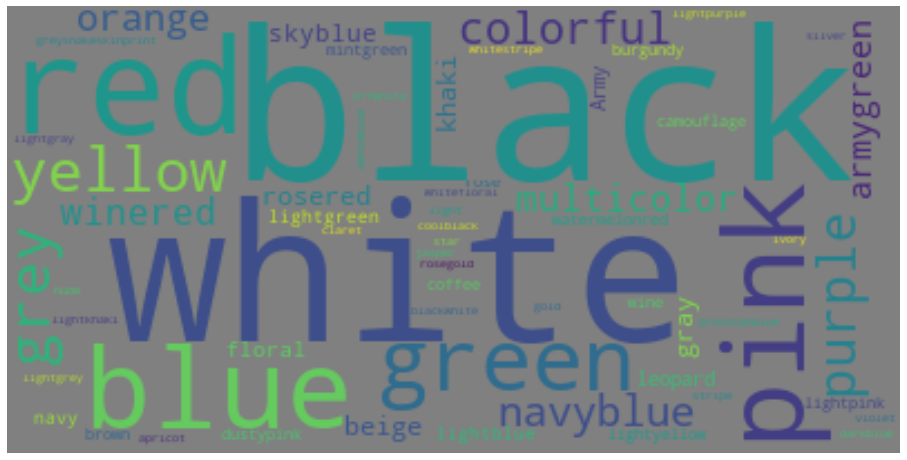

In [19]:
allcolors = ''
allcolors_total = ''
wish_df['product_color'] = wish_df['product_color'].fillna('colorful')

for i, j in enumerate(wish_df[good_sales].product_color):
    sold_units = wish_df[good_sales]['units_sold'].iloc[i]/1000
    allcolors += ' ' + str(j)
    allcolors_total += ('  ' + str(j))*int(sold_units)

plt.figure(figsize=(16,16))
cloud = WordCloud(max_words=100, background_color="gray").generate(allcolors)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Most listed colors include
* black 
* white
* blue
* pink
* red

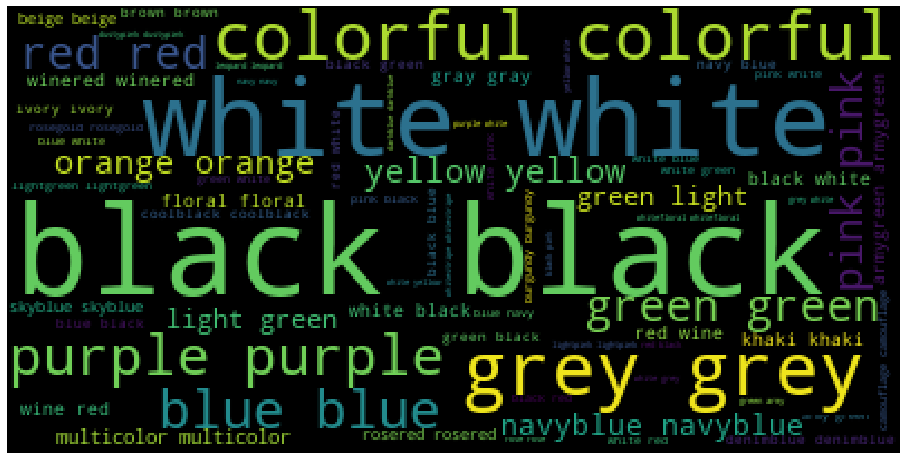

In [20]:
plt.figure(figsize=(16,16))
cloud = WordCloud(max_words=100, background_color="black").generate(allcolors_total)
plt.imshow(cloud)
plt.axis("off", interpolation='bilinear')
plt.show()

Interestingly, the most listed colors are not the most sold except in the case of black and white.  

**Blue, pink and red are not sold as much as gray, though higher number of listings are present**

Next, in order to quantify the sales of colors we are making some crude approximations. For example:
* some similar colors like coffee and brown are treated as the same. 
* light and dark shades are treated as the same color

In [21]:
# all letters made lower case
wish_df['product_color'] = wish_df['product_color'].str.lower()

# to simplify the number of colours some approximations are taken
# all light/dark shades are treated as the same parent color
wish_df['product_color'] = wish_df['product_color'].str.replace('light','')
wish_df['product_color'] = wish_df['product_color'].str.replace('dark','')
wish_df['product_color'] = wish_df['product_color'].str.replace('white & black','black & white')
# now some crude approximations
wish_df['product_color'] = wish_df['product_color'].str.replace('tan','camel')
wish_df['product_color'] = wish_df['product_color'].str.replace('rose','pink')
wish_df['product_color'] = wish_df['product_color'].str.replace('grey','gray')
wish_df['product_color'] = wish_df['product_color'].str.replace('coffee','brown')


# we take these colors are main colors and anything else derived from it as the main color
# except when there is & in the name of the color
colors = ['red', 'green', 'blue', 'black', 'pink', 'yellow', 'white', 'gold']
for subcolor in wish_df['product_color'].unique():
    if '&' not in subcolor:
        for maincolor in colors:
            if maincolor in subcolor:
                wish_df['product_color'] = wish_df['product_color'].str.replace(subcolor, maincolor)


Further, we consider only those items which are sold more than 5000 units for ease of plotting.

['white' 'green' 'leopardprint' 'black' 'yellow' 'blue' 'beige' 'gray'
 'orange' 'red' 'colorful' 'pink' 'khaki' 'red & blue' 'blue & pink'
 'white &green' 'black &green' 'purple' 'floral' 'orange & camouflage'
 'multicolor' 'camouflage' 'pink & black' 'silver' 'pink & gray' 'brown'
 'leopard' 'black & white' 'star' 'apricot' 'burgundy' 'claret'
 'pink & white' 'camel' 'pink & blue' 'nude' 'army' 'black & stripe'
 'graysnakeskinprint' 'navy' 'gray & white' 'brown & yellow'
 'red & yellow' 'rainbow' 'blue & white' 'white & red' 'wine' 'ivory'
 'black & yellow' 'jasper' 'violet' 'black & blue' 'gold']


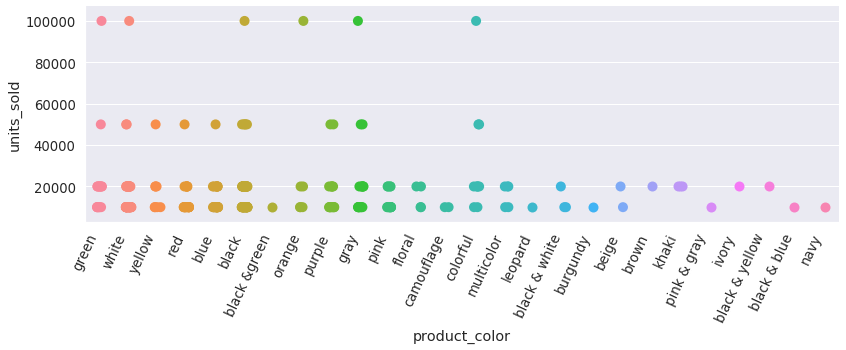

In [22]:
print(wish_df['product_color'].unique())

unique_colors = wish_df['product_color'].unique()
color_sales = np.zeros(len(unique_colors))
for i, icolor in enumerate(unique_colors):
    color_sales[i] = wish_df[wish_df['product_color'] == icolor].units_sold.sum()
good_sales = wish_df[wish_df['units_sold'] >= 5000]


chart = sns.catplot(x='product_color', y='units_sold', kind="strip", data=wish_df[wish_df['units_sold'] > 5000], aspect=3, height=4, s=10);
chart.set_xticklabels(rotation=65, horizontalalignment='right')

This shows the most sold colors during summer.

Suggestion:
* Convert all the colors into categorical variables for fitting

## Miscellaneous

Now we look at some impact of other factors such as inventory, badges, shipping, etc. on sales


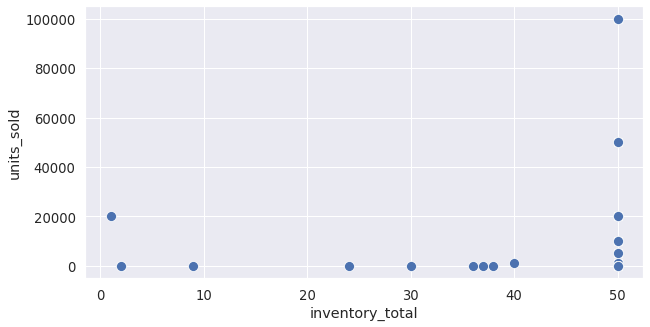

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(y=wish_df.units_sold, x=wish_df.inventory_total, s=100)

This figure shows the relevants of inventory total on sales.

The products are sold in high numbers either
* when the inventory total is very low  
OR 
* when the inventory total is real high

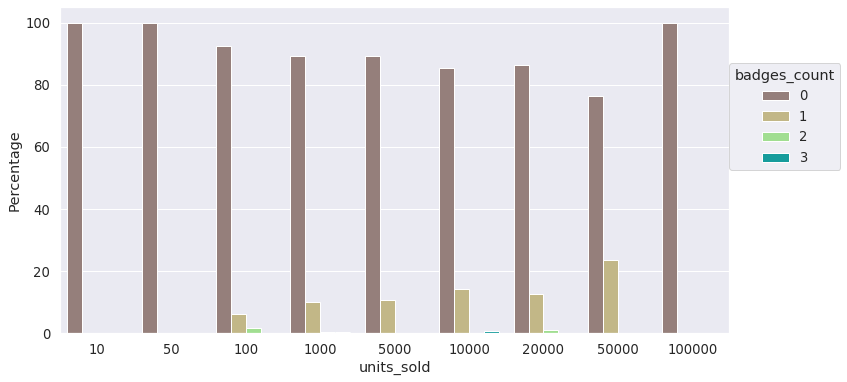

In [24]:
params = ['badges_count', 'badge_local_product', 'badge_product_quality', 'badge_fast_shipping', 'units_sold']
badge_correlation = wish_df[params].corr().round(2) 

# plt.figure(figsize=(6,6))
# ax = sns.heatmap(badge_correlation.round(2), annot=True, linewidths=.5, cmap='hot')
# ax.set_ylim(len(params), 0) 

plt.figure(figsize=(12,6))
badge_sales = (wish_df.groupby(['units_sold'])['badges_count'].value_counts(normalize=True).rename('Percentage').mul(100)
            .reset_index())
# print(merch_pic)
sns.barplot(x='units_sold', y='Percentage', hue='badges_count', data=badge_sales, palette="terrain_r")
plt.legend(title='badges_count', loc=(1,0.5))

From the above figure **one can argue that having at least a badge helps in sales**, except for those products which are in the highest sales regime.

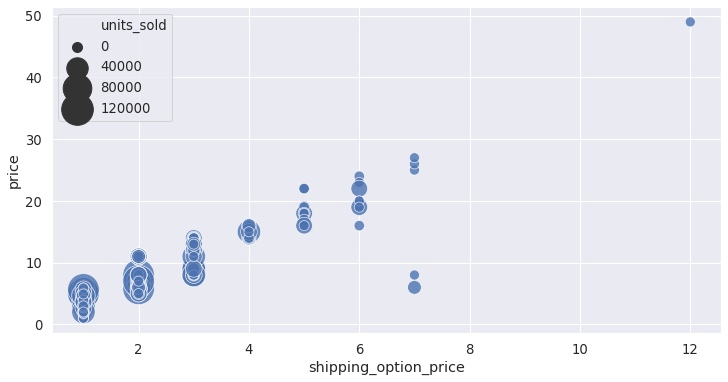

In [25]:
plt.figure(figsize=(12,6))

sns.scatterplot(x=wish_df.shipping_option_price, y=wish_df.price, size=wish_df.units_sold, sizes=(100,1000), alpha=0.8)

This figure shows that shipping price has a strong linear relationship with price. Hence we need not consider shipping option price while considering price.

Now we examine if the urgency banner has any impact on sales.

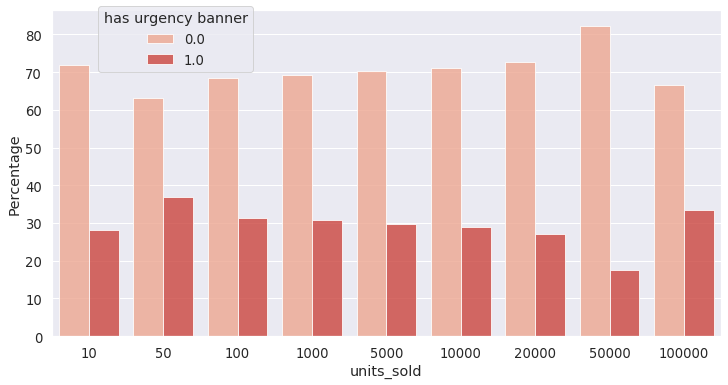

In [26]:
plt.figure(figsize=(12,6))
banner_sales = (wish_df.groupby(['units_sold'])['has_urgency_banner'].value_counts(normalize=True).rename('Percentage').mul(100)
            .reset_index())
# print(merch_pic)
sns.barplot(x='units_sold', y='Percentage', hue='has_urgency_banner', data=banner_sales, palette="Reds", alpha=0.8)
plt.legend(title='has urgency banner', loc=(0.07,0.81))

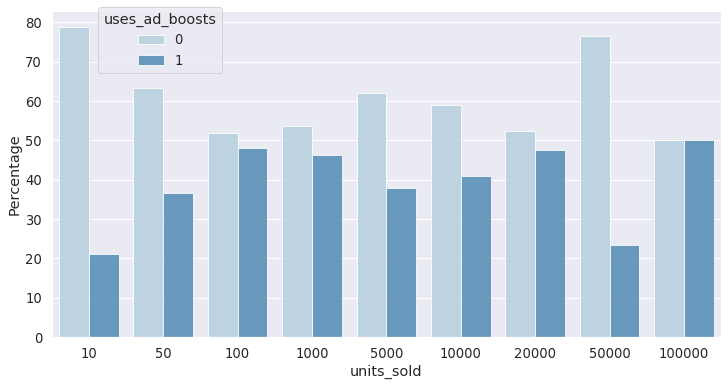

In [27]:
plt.figure(figsize=(12,6))
ad_sales = (wish_df.groupby(['units_sold'])['uses_ad_boosts'].value_counts(normalize=True).rename('Percentage').mul(100)
            .reset_index())
# print(merch_pic)
sns.barplot(x='units_sold', y='Percentage', hue='uses_ad_boosts', data=ad_sales, palette="Blues", alpha=0.8)
plt.legend(title='uses_ad_boosts', loc=(0.07,0.81))

From the above figures, we can see that for nearly all different regimes of sales, we cannot make a clear call about the role ad boosts and urgency banners play.

As the sales of a particular item increase, **the urgency banner and ad booster seems to have less impact** (except on the highest sales regime). So, it's not clear whether the urgency banner has any impact on the sales.

For the sale of products in the range of 50000, the ad boost and urgency banner has very less impact.

## Price and sales 

Now, we look at the most complex relation - how the price affects the sales.  

There are two prices given - `retail_price` and `price`. `retail_price` is the real price and `price` is the discounted price.

We use variables for price difference `price_diff` as = `retail_price` - `price` and  
percentage price difference `price_diff_perc` as = (`retail_price` - `price`)* 100/`retail_price`  

If `price_diff` is positive, then the retail price is higher. Then the customer sees an opportunity to make a saving.
If `price_diff` is negative, then the retail price is lower. Then the customer doesn't have see an opportunity to make a saving.

First we examine the correlation between `price`, `retail_price`, `price_diff`, `price_diff_perc` and `units_sold`.

<Figure size 720x720 with 0 Axes>

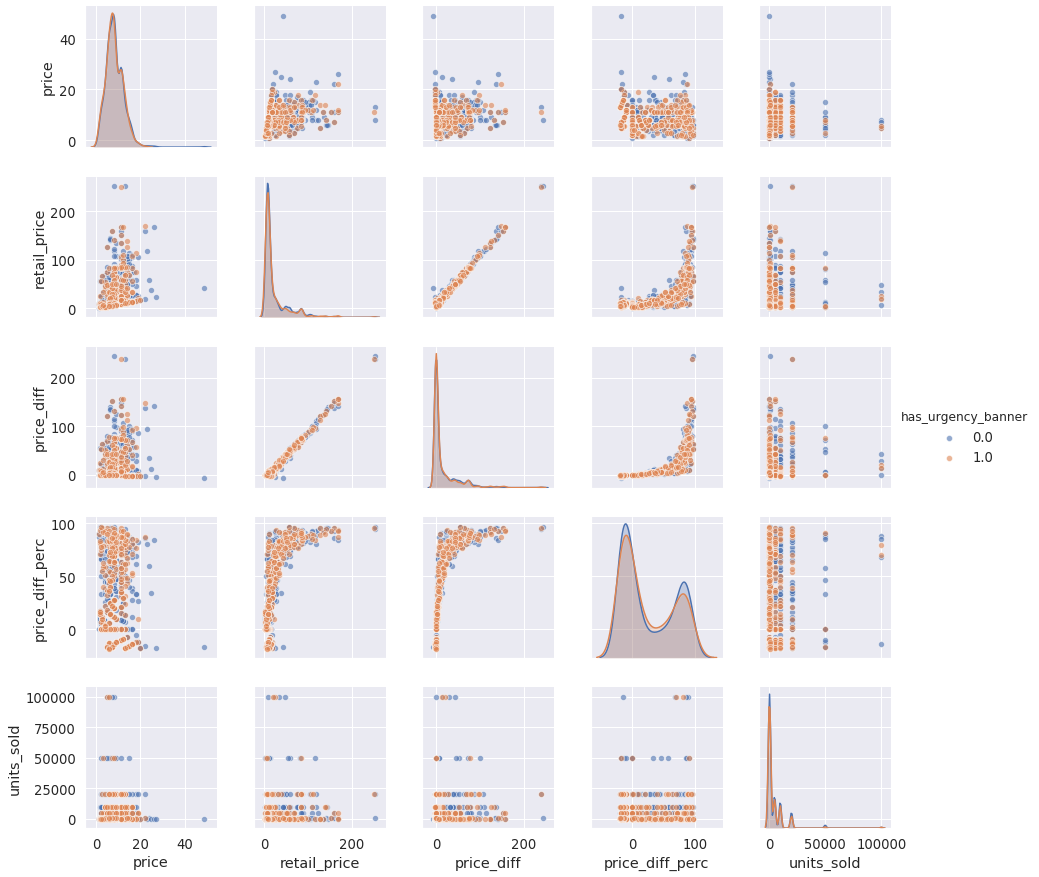

In [28]:
# discounted price vs original retail price
wish_df['price_diff'] = wish_df['retail_price']-wish_df['price']
#if price_diff is positive, then retail price is higher. then the customer sees a profit
#if price_diff is negative, then retail price is lower. then the customer doesn't see a profit
wish_df['price_diff_perc'] = (wish_df['retail_price']-wish_df['price'])*100/wish_df['retail_price']

params = ['price', 'retail_price', 'price_diff', 'price_diff_perc', 'units_sold']
params1 = ['price', 'retail_price', 'price_diff_perc', 'units_sold']
price_correlation = wish_df[params].corr().round(2) 

plt.figure(figsize=(10,10))
sns.pairplot(data=wish_df, vars=params, hue='has_urgency_banner',  plot_kws=dict(alpha=0.6) )

**Insights**
* **most of the highly sold products cost less than 25 EUR**
* very few items sell well above 25 EUR
* retail_price and price_diff has a linear relationship
* retail_price and price_diff_perc has higher degree of relation
* sales and discount price distributions are unaffected by has_urgency_banner sign

If the price_diff is negative, then the retail price is lower. The customer then doesn't see an opportunity to save.

38.9 % products are sold at negative price_diff.
11.9 % products are sold at zero price_diff.
47.2 % products are sold at less than 100 EUR price_diff.
2.0 % products are sold at more than 100 EUR price_diff.


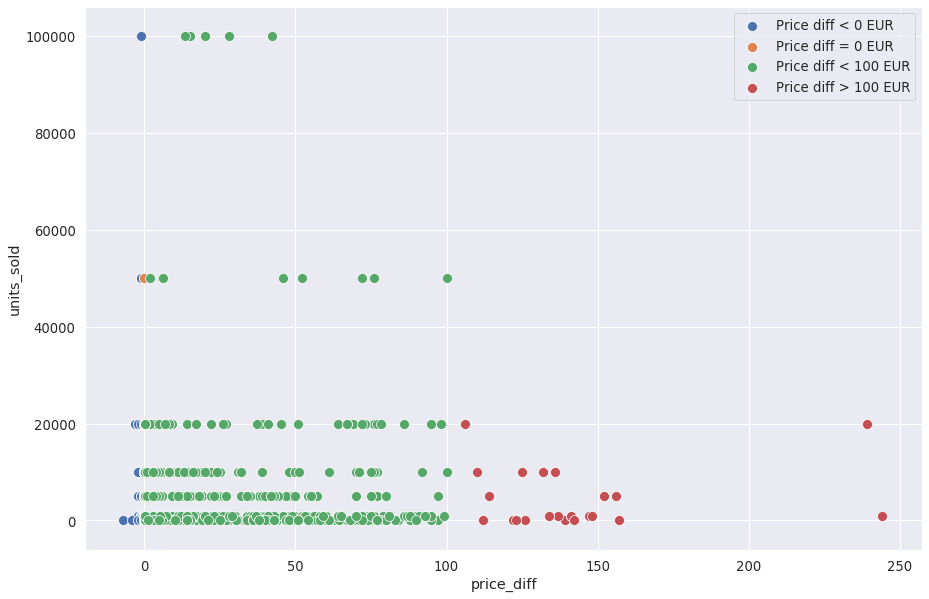

In [29]:
pdneg = wish_df[wish_df['price_diff'] < 0 ]
pd0 = wish_df[wish_df['price_diff'] == 0 ]
pd100 = wish_df[(wish_df['price_diff'] <= 100) & (wish_df['price_diff'] > 0)]
pd1000 = wish_df[wish_df['price_diff'] > 100]
plt.figure(figsize=(15,10))
sns.scatterplot(x=pdneg.price_diff, y=pdneg.units_sold, s=100, label='Price diff < 0 EUR' )
sns.scatterplot(x=pd0.price_diff, y=pd0.units_sold, s=100, label='Price diff = 0 EUR' )
sns.scatterplot(x=pd100.price_diff, y=pd100.units_sold, s=100, label='Price diff < 100 EUR' )
sns.scatterplot(x=pd1000.price_diff, y=pd1000.units_sold, s=100, label='Price diff > 100 EUR'  )
plt.legend()
net_sold = wish_df.units_sold.sum()
pdnegsum = pdneg.units_sold.sum()
pd0sum = pd0.units_sold.sum()
pd100sum = pd100.units_sold.sum()
pd1000sum = pd1000.units_sold.sum()
print('If the price_diff is negative, then the retail price is lower. The customer then doesn\'t see an opportunity to save.\n')
print('%2.1f %% products are sold at negative price_diff.'%(pdnegsum/net_sold*100))
print('%2.1f %% products are sold at zero price_diff.'%(pd0sum/net_sold*100))
print('%2.1f %% products are sold at less than 100 EUR price_diff.'%(pd100sum/net_sold*100))
print('%2.1f %% products are sold at more than 100 EUR price_diff.'%(pd1000sum/net_sold*100))

**For nealry 50% of the products sold, the customer doesn't see an oppportunity to save (`price_diff` $\leq$ 0 EUR)**  
**If the `price_diff` is more than 100 EUR, the sales is lower.**

If the price_diff is negative, then the retail price is lower. The customer then doesn't see an opportunity to save. 

38.9 % products are sold at negative price_diff: 
11.9 % products are sold at the same price: 
15.6 % products are sold at less than 0-50 % price difference: 
33.6 % products are sold at more than 50-100 % price difference: 


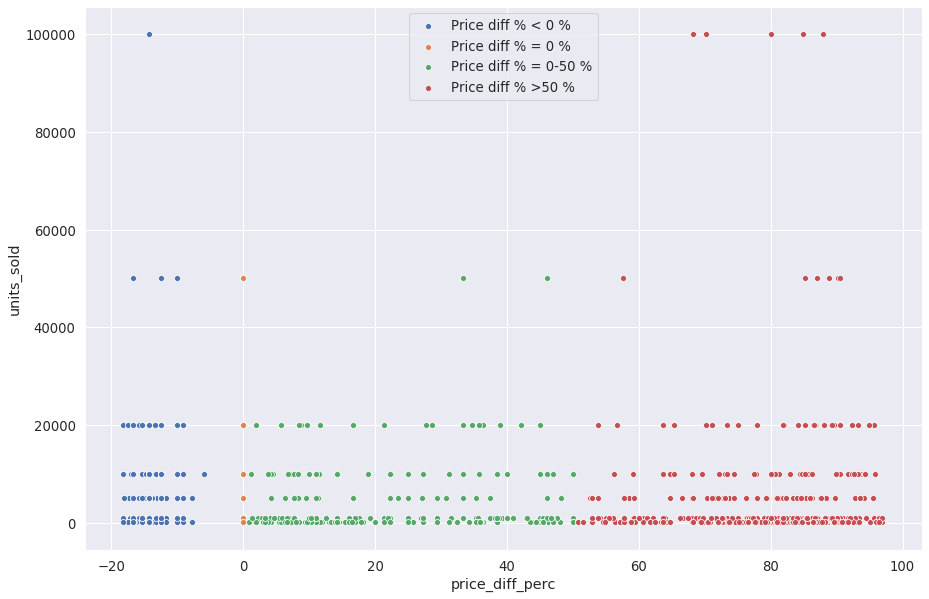

In [30]:
pcneg = wish_df[wish_df['price_diff_perc'] < 0]
pc0 = wish_df[wish_df['price_diff_perc'] == 0]
pc50 = wish_df[(wish_df['price_diff_perc'] <= 50) & (wish_df['price_diff_perc'] > 0)]
pc100 = wish_df[wish_df['price_diff_perc'] > 50]

plt.figure(figsize=(15,10))
sns.scatterplot(x=pcneg.price_diff_perc, y=pcneg.units_sold, label='Price diff % < 0 %' )
sns.scatterplot(x=pc0.price_diff_perc, y=pc0.units_sold, label='Price diff % = 0 %' )
sns.scatterplot(x=pc50.price_diff_perc, y=pc50.units_sold, label='Price diff % = 0-50 %' )
sns.scatterplot(x=pc100.price_diff_perc, y=pc100.units_sold, label='Price diff % >50 %' )
plt.legend()
pcnegsum = pcneg.units_sold.sum()
pc0sum = pc0.units_sold.sum()
pc50sum = pc50.units_sold.sum()
pc100sum = pc100.units_sold.sum()
# print(pcnegsum/net_sold, pc0sum/net_sold, pc50sum/net_sold, pc100sum/net_sold)
print('If the price_diff is negative, then the retail price is lower. The customer then doesn\'t see an opportunity to save. \n')
print('%2.1f %% products are sold at negative price_diff: '%(pcnegsum/net_sold*100))
print('%2.1f %% products are sold at the same price: '%(pc0sum/net_sold*100))
print('%2.1f %% products are sold at less than 0-50 %% price difference: '%(pc50sum/net_sold*100))
print('%2.1f %% products are sold at more than 50-100 %% price difference: '%(pc100sum/net_sold*100))

**Insights**  
The highest sales occurs when either
* the customer doens't see an opportunity to save
OR
* the customer sees an opportunity to save more than 50% of the price

One third of the sales occur in these categories.

# Conclusion of EDA
We see that the following parameters impact the sales strongly
1. Ratings
2. Ratings count
3. Merchant ratings
4. Merchant rate count
5. Price
6. Color
7. Product size

# Model fitting

Here our target variable is given in categories. However, they are numbers.
Here I will be examining whether it's better to use classification or regression for better fitting using KNeighbors method.

In [31]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

X_labels = ['price', 'price_diff', 'rating', 'rating_count', 'countries_shipped_to', 'inventory_total',
            'merchant_rating', 'merchant_rating_count', 'merchant_has_profile_picture' ]

X_train, X_test, y_train, y_test = train_test_split(wish_df[X_labels], wish_df['units_sold'], test_size=0.7, random_state=42)
knc = KNeighborsClassifier()
params = {'n_neighbors': np.arange(5, 25)}

clf = GridSearchCV(knc, param_grid=params, cv=10)
clf.fit(X_train, y_train)

clf.predict(X_test)
clf.score(X_test, y_test)
print(clf.best_params_)
print(clf.best_score_)

/home/jayanth/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


{'n_neighbors': 5}
0.455531453362256


/home/jayanth/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [32]:
X_labels.extend(['product_color', 'product_variation_size_id'])
X_labels.extend(['badges_count'])
X_labels.extend(['rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count'])

In [33]:
wish_df[X_labels].fillna(0)

,price,price_diff,rating,rating_count,countries_shipped_to,inventory_total,merchant_rating,merchant_rating_count,merchant_has_profile_picture,product_color,product_variation_size_id,badges_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count
0,16.00,-2.00,3.76,54,34,50,4.128521,568,0,white,M,0,26.0,8.0,10.0,1.0,9.0
1,8.00,14.00,3.45,6135,41,50,3.899673,17752,0,green,XS,0,2269.0,1027.0,1118.0,644.0,1077.0
2,8.00,35.00,3.57,14,36,50,3.989831,295,0,leopardprint,XS,0,5.0,4.0,2.0,0.0,3.0
3,8.00,0.00,4.03,579,41,50,4.020435,23832,0,black,M,0,295.0,119.0,87.0,42.0,36.0
4,2.72,0.28,3.10,20,35,50,4.001588,14482,0,yellow,S,0,6.0,4.0,2.0,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,6.00,3.00,4.08,1367,41,50,4.224605,5316,0,blue,S,0,722.0,293.0,185.0,77.0,90.0
1569,2.00,54.00,3.07,28,26,50,3.696054,4435,0,blue,S,0,11.0,3.0,1.0,3.0,10.0
1570,5.00,14.00,3.71,59,11,50,3.961905,210,0,white,SIZE S,0,24.0,15.0,8.0,3.0,9.0
1571,13.00,-2.00,2.50,2,29,50,3.774194,31,0,white,S.,0,0.0,1.0,0.0,0.0,1.0


In [34]:
print(X_labels)
lenc = LabelEncoder()
wish_df['product_color'] = lenc.fit_transform(wish_df['product_color'])
wish_df['product_variation_size_id'] = lenc.fit_transform(wish_df['product_variation_size_id'])

wish_df[X_labels] = wish_df[X_labels].fillna(0)
knr = KNeighborsRegressor()
# X_train, X_test, y_train, y_test = train_test_split(wish_df[X_labels], wish_df['units_sold'], test_size=0.7, random_state=42)

clf = GridSearchCV(knr, param_grid=params, cv=15)
clf.fit(wish_df[X_labels], wish_df['units_sold'])

# clf.predict(X_test)
# clf.score(X_test, y_test)
print(clf.best_params_)
print(clf.best_score_)

['price', 'price_diff', 'rating', 'rating_count', 'countries_shipped_to', 'inventory_total', 'merchant_rating', 'merchant_rating_count', 'merchant_has_profile_picture', 'product_color', 'product_variation_size_id', 'badges_count', 'rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count']
{'n_neighbors': 5}
0.5766926902537737


/home/jayanth/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The above results indicate that using KNeighbors algorithm,
* the optimal number of neighbors to have is
* regressor performs better than classifier